In [1]:
import sys
sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

from model.load import read_csv

from lifelines import KaplanMeierFitter

from tabulate import tabulate

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm"],
})


In [4]:
np.random.seed(1234)
_ = torch.manual_seed(123)

In [5]:
datapath = '../Data/data.csv'
data = read_csv(datapath)
print(len(data))

40018


In [6]:
T = data['DAYS_SINCE_DIAGNOSIS']
sites = data.columns[data.columns.str.contains('SITE_')]
median = []
for i, site in enumerate(sites):
    ix = data[site] == 1
    median.append(T[ix].median()/365*12)
to_tab = np.stack((sites, np.round(median,1)), axis=1)
print(tabulate(to_tab, headers=['Site', 'Months']))

Site        Months
--------  --------
SITE_C70      31.9
SITE_C71      11.7
SITE_C72      28.5
SITE_D32      36.7
SITE_D33      41.5
SITE_D35      44.6


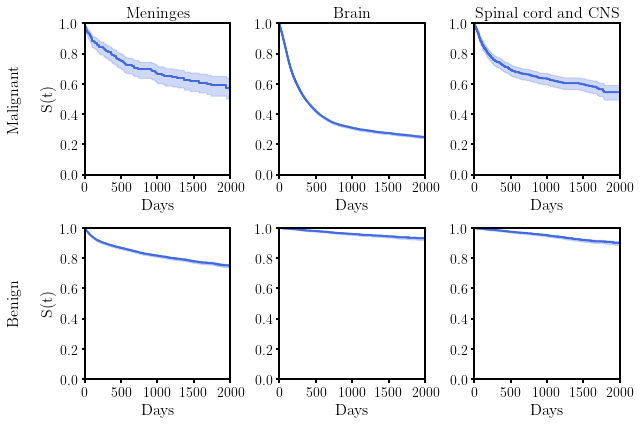

In [7]:
T = data['DAYS_SINCE_DIAGNOSIS']
E = data['EVENT']
kmf = KaplanMeierFitter()

sites = data.columns[data.columns.str.contains('SITE_')]
labels = ['Meninges', 'Brain', 'Spinal cord and CNS']
for i, site in enumerate(sites):
    ax = plt.subplot(2, 3, i + 1)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    
    ix = data[site] == 1
    kmf.fit(T[ix], E[ix], label=site)
    # kmf.plot_survival_function(ax=ax, legend=False, color='#7EA6E0',ci_force_lines=False, figsize=(9,6), linewidth=2)
    kmf.plot_survival_function(ax=ax, legend=False, color='royalblue',ci_force_lines=False, figsize=(9,6), linewidth=2)

    if i < 3:
        plt.title(labels[i], fontsize=16)
    plt.xlabel('Days', fontsize=16)
    plt.xticks([i * 500 for i in range(5)], fontsize=14)
    plt.xlim(0,2000)
    plt.ylim(0.0, 1.0)
    plt.yticks(fontsize=14)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    if i==0 :
        plt.ylabel('Malignant \n \n S(t)', fontsize=16)    
    if i==3 :
        plt.ylabel('Benign \n \n S(t)', fontsize=16)    

plt.tight_layout()
plt.savefig('../figs/KMcurves.png', dpi=600, format='png')
# C70 Malignant neoplasm of meninges
# C71 Malignant neoplasm of brain
# C72 Malignant neoplasm of spinal cord, cranial nerves and other parts of central nervous system

# D32 Benign neoplasm of meninges
# D33 Benign neoplasm of brain and other parts of central nervous system
# D35 Benign neoplasm of other and unspecified endocrine glands

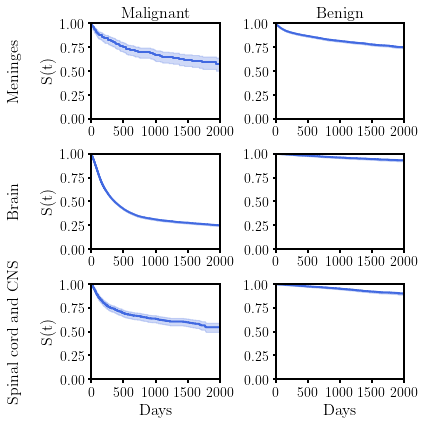

In [26]:
T = data['DAYS_SINCE_DIAGNOSIS']
E = data['EVENT']
kmf = KaplanMeierFitter()

sites = data.columns[data.columns.str.contains('SITE_')]
import itertools
sites = list(itertools.chain(*zip(sites[0:3], sites[3:6])))
labels = ['Meninges', 'Brain', 'Spinal cord and CNS']
for i, site in enumerate(sites):
    ax = plt.subplot(3, 2, i + 1)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    
    ix = data[site] == 1
    kmf.fit(T[ix], E[ix], label=site)
    # kmf.plot_survival_function(ax=ax, legend=False, color='#7EA6E0',ci_force_lines=False, figsize=(9,6), linewidth=2)
    kmf.plot_survival_function(ax=ax, legend=False, color='royalblue',ci_force_lines=False, figsize=(6,6), linewidth=2)

    if i == 0:
        plt.title('Malignant', fontsize=16)
    if i == 1:
        plt.title('Benign', fontsize=16)
    plt.xlabel(None)
    if i > 3:
        plt.xlabel('Days', fontsize=16)
    plt.xticks([i * 500 for i in range(5)], fontsize=14)
    plt.xlim(0,2000)
    plt.ylim(0.0, 1.0)
    plt.yticks(fontsize=14)
    ax.xaxis.set_tick_params(width=2)
    ax.yaxis.set_tick_params(width=2)
    if i==0 :
        plt.ylabel('Meninges \n \n S(t)', fontsize=16)    
    if i==2 :
        plt.ylabel('Brain \n \n S(t)', fontsize=16)    
    if i==4 :
        plt.ylabel('Spinal cord and CNS \n \n S(t)', fontsize=16)    

plt.tight_layout()
plt.savefig('../figs/KMcurves-paper.png', dpi=600, format='png')
# C70 Malignant neoplasm of meninges
# C71 Malignant neoplasm of brain
# C72 Malignant neoplasm of spinal cord, cranial nerves and other parts of central nervous system

# D32 Benign neoplasm of meninges
# D33 Benign neoplasm of brain and other parts of central nervous system
# D35 Benign neoplasm of other and unspecified endocrine glands

['SITE_C70', 'SITE_D32', 'SITE_C71', 'SITE_D33', 'SITE_C72', 'SITE_D35']